In [104]:
import os
import csv
import ast
import json
import copy
import random
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

# Load labels information

In [2]:
with open('/mnt/sda/coral/label_set.json', 'r') as f:
    labels = json.load(f)
labels = sorted(labels, key=lambda i: i['id'])
labels_id = [l['id'] for l in labels]

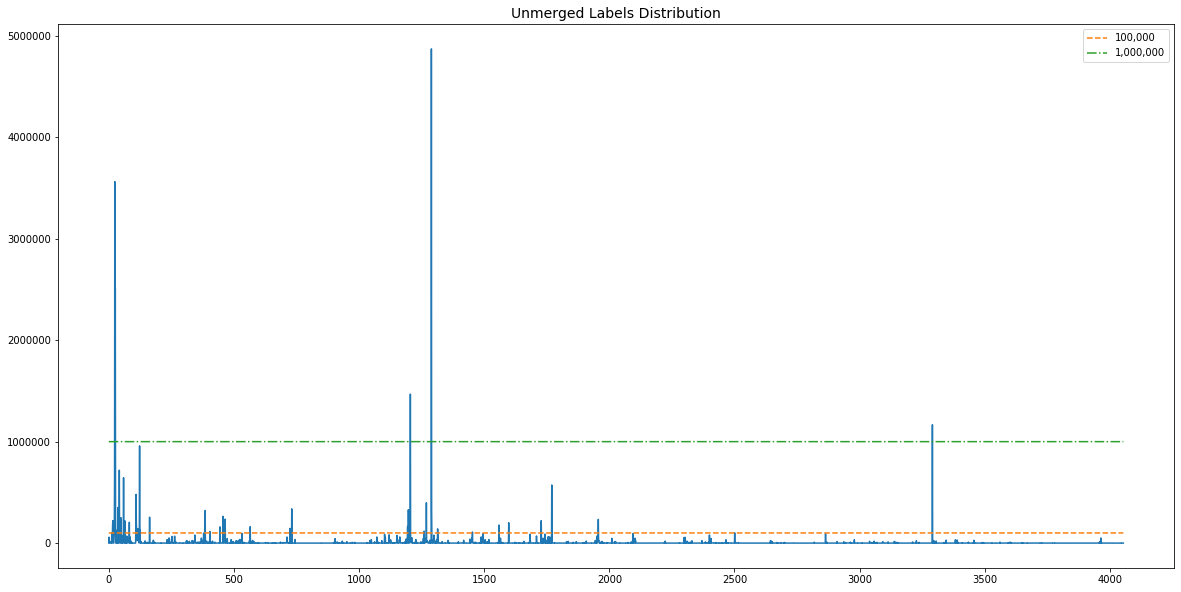

In [3]:
labels_ann_count = [i['ann_count'] for i in labels]
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(labels)), labels_ann_count)
plt.plot(np.arange(len(labels)), [100000]*len(labels), '--', label='100,000')
plt.plot(np.arange(len(labels)), [1000000]*len(labels), '-.', label='1,000,000')
plt.title('Unmerged Labels Distribution', fontsize=14)
plt.legend()

# Merge duplicated labels

In [4]:
merged_labels = copy.deepcopy(labels)
duplicated_labels = [i for i in labels if i['duplicate_of'] != 'None']
for i in duplicated_labels:
    for j in merged_labels:
        if j['name'] == i['duplicate_of']:
            j['ann_count'] += i['ann_count']
            merged_labels.remove(i)
            break

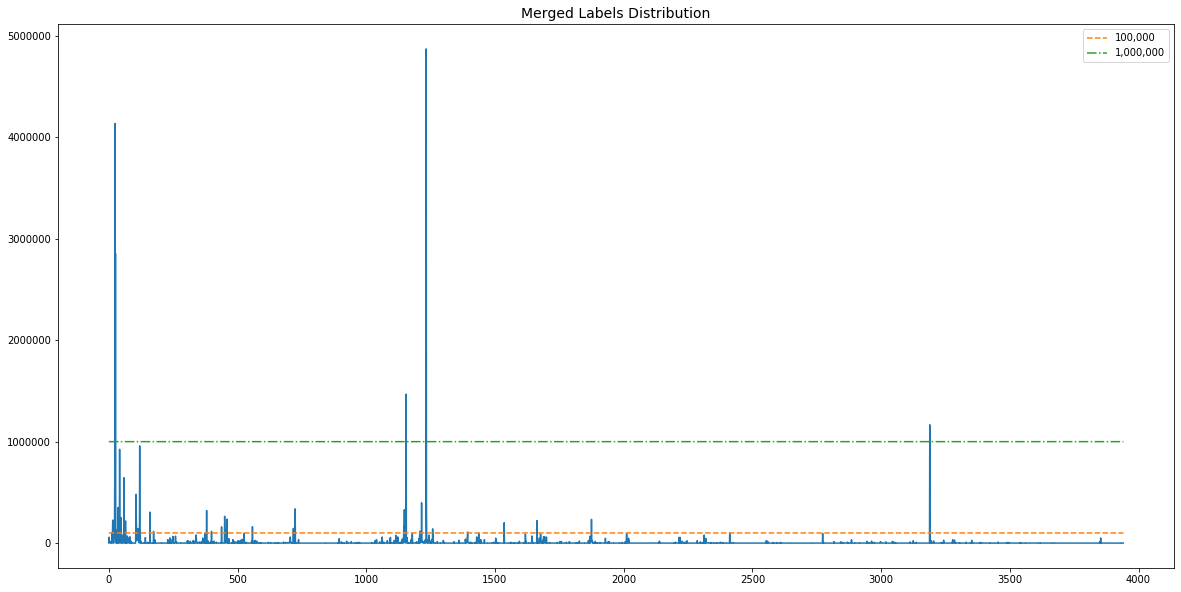

In [5]:
merged_labels_ann_count = [i['ann_count'] for i in merged_labels]
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(merged_labels)), merged_labels_ann_count)
plt.plot(np.arange(len(merged_labels)), [100000]*len(merged_labels), '--', label='100,000')
plt.plot(np.arange(len(merged_labels)), [1000000]*len(merged_labels), '-.', label='1,000,000')
plt.title('Merged Labels Distribution', fontsize=14)
plt.legend()

# Log scale

In [14]:
log_labels_ann_count = np.array(merged_labels_ann_count)
log_labels_ann_count = np.where(log_labels_ann_count==0, 0.5, log_labels_ann_count)
log_labels_ann_count = np.where(log_labels_ann_count!=0.5, np.log10(log_labels_ann_count), 0)
merged_labels_id = [l['id'] for l in merged_labels]

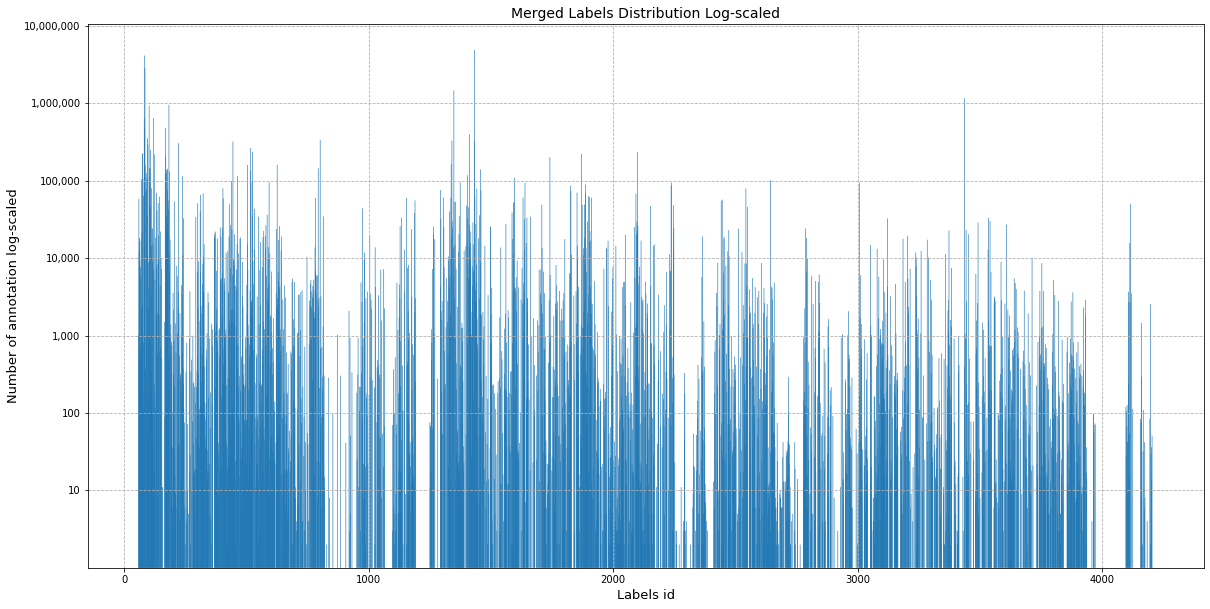

In [34]:
plt.figure(figsize=(20, 10))
plt.bar(merged_labels_id, log_labels_ann_count, align='center', width=2.5, snap=False)
plt.title('Merged Labels Distribution Log-scaled', fontsize=14)
plt.xlabel('Labels id', fontsize=13)
plt.ylabel('Number of annotation log-scaled', fontsize=13)
plt.yticks([1,2,3,4,5,6,7], labels=["10", "100", "1,000", "10,000", "100,000", "1,000,000", "10,000,000"])
plt.grid(True, ls='--')
plt.savefig('label_distribution.png')

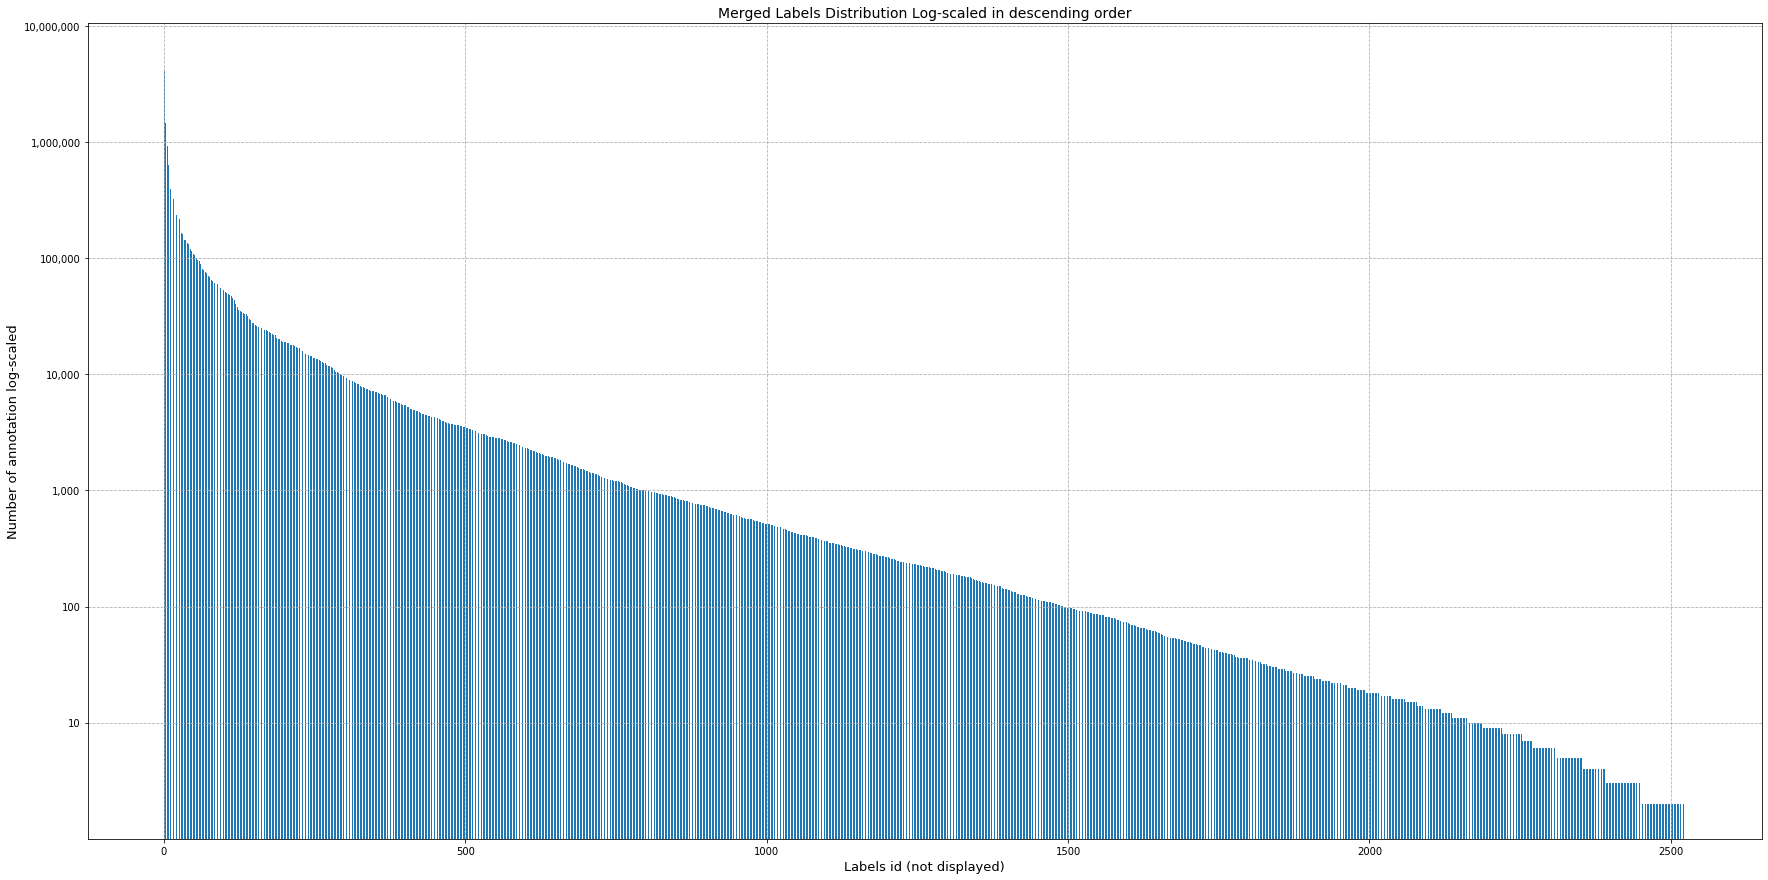

In [38]:
non_zero_log_labels_ann_count = sorted(log_labels_ann_count, reverse=True)
non_zero_log_labels_ann_count = [i for i in non_zero_log_labels_ann_count if i!=0]
plt.figure(figsize=(30, 15))
plt.bar(np.arange(len(non_zero_log_labels_ann_count)), non_zero_log_labels_ann_count, 
        align='center', width=0.6)
plt.title('Merged Labels Distribution Log-scaled in descending order', fontsize=14)
# plt.xticks(np.arange(len(non_zero_log_labels_ann_count)), labels=non_zero_label_id, rotation='vertical')
plt.xlabel('Labels id (not displayed)', fontsize=13)
plt.ylabel('Number of annotation log-scaled', fontsize=13)
plt.yticks([1,2,3,4,5,6,7], labels=["10", "100", "1,000", "10,000", "100,000", "1,000,000", "10,000,000"])
plt.grid(True, ls='--')
plt.savefig('label_distribution_descending_order.png')

In [61]:
non_zero_label_id

array([1432,   82,   84, ..., 2726, 3343,  270])

# Label distribution in different annotation count interval

In [171]:
def print_number_of_label(l, r):
    label = [i['ann_count'] for i in merged_labels if l <= i['ann_count'] < r]
    print("Number of labels with {} <= ann_count <= {}: {}".format(l, r, len(label)))
    
def plot_label_distribution(l, r):
    label = [i['ann_count'] for i in merged_labels if l <= i['ann_count'] < r]
    plt.figure(figsize=(8, 5))
    plt.hist(label, bins=int(r/l) if l !=0 else r, rwidth=0.8)
    plt.title('Total: {}'.format(len(label)))
    plt.xlabel('# of annotation count')
    plt.ylabel('# of labels')
    plt.show()

In [173]:
print_number_of_label(0, 100)
print_number_of_label(100, 1000)
print_number_of_label(100, 10000)
print_number_of_label(100, 100000)
print_number_of_label(100, 1000000)
print_number_of_label(100, 10000000)
print_number_of_label(1000, 10000000)

Number of labels with 0 <= ann_count <= 100: 2445
Number of labels with 100 <= ann_count <= 1000: 698
Number of labels with 100 <= ann_count <= 10000: 1203
Number of labels with 100 <= ann_count <= 100000: 1443
Number of labels with 100 <= ann_count <= 1000000: 1492
Number of labels with 100 <= ann_count <= 10000000: 1497
Number of labels with 1000 <= ann_count <= 10000000: 799


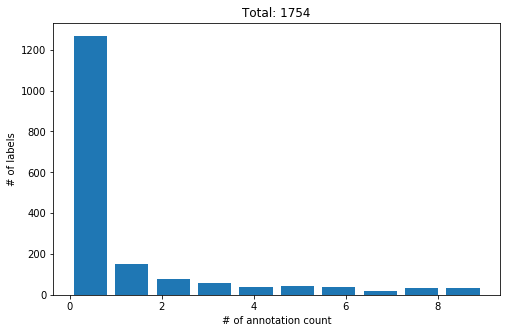

In [154]:
plot_label_distribution(0, 10)

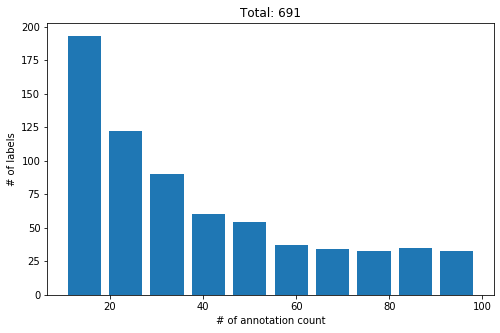

In [155]:
plot_label_distribution(10, 100)

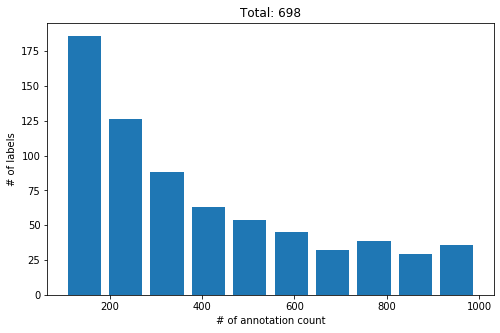

In [156]:
plot_label_distribution(100, 1000)

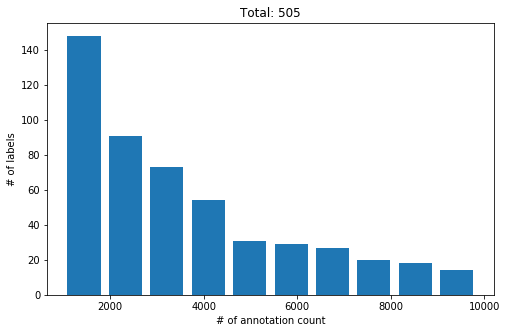

In [157]:
plot_label_distribution(1000, 10000)

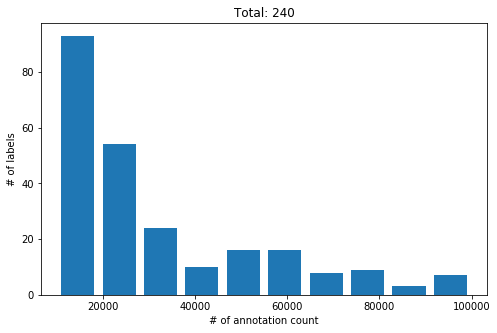

In [158]:
plot_label_distribution(10000, 100000)

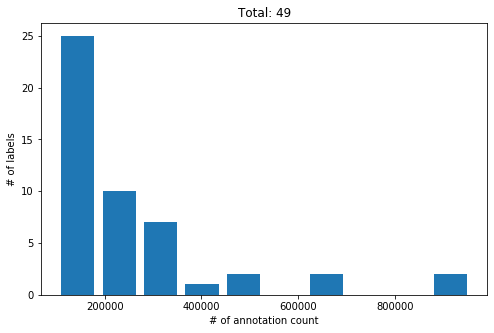

In [159]:
plot_label_distribution(100000, 1000000)

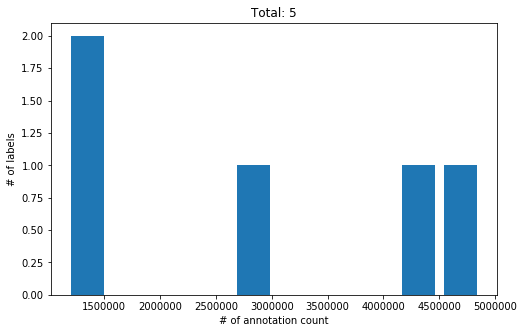

In [175]:
plot_label_distribution(1000000, 10000000)

# Write CSV files

In [ ]:
with open('meta_unmerged_labels.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['id', 'name', 'ann_count', 'duplicate_of']
    )
    writer.writeheader()
with open('meta_merged_labels.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['id', 'name', 'ann_count']
    )
    writer.writeheader()

In [9]:
meta_unmerged_labels = [[i['id'], i['name'], i['ann_count'], i['duplicate_of']] for i in labels]
meta_merged_labels = [[i['id'], i['name'], i['ann_count']] for i in merged_labels]

In [12]:
with open('meta_unmerged_labels.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for i in meta_unmerged_labels:
        writer.writerow(i)
csvin.close()

In [13]:
with open('meta_merged_labels.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for i in meta_merged_labels:
        writer.writerow(i)
csvin.close()

# Each source info

In [22]:
source_list = sorted(os.listdir('/mnt/sda/coral'))[1:]

In [64]:
def source_info(source):
    # source meta
    with open('/mnt/sda/coral/' + source + '/meta.json', 'r') as f:
        source_meta = json.load(f)
    f.close()
    # image meta in source
    num_anns = 0
    source_label = []
    anns_root_path = '/mnt/sda/coral/' + source + '/images'
    source_files = os.listdir(anns_root_path)
    anns_json_list = sorted([ajl for ajl in source_files if ajl.endswith('.anns.json')])
    for anns_json in anns_json_list:
        with open(os.path.join(anns_root_path, anns_json), 'r') as f:
            anns_meta = json.load(f)
        f.close()
        num_anns += len(anns_meta)
        source_label += [anns['label'] for anns in anns_meta]
    # info
    source_name = source
    num_confirmed_img = int(source_meta['nbr_confirmed_images'])
    num_confirmed_anns = num_anns
    source_label = sorted(list(set(source_label)))
    num_label = len(source_label)
    return [source_name, num_confirmed_img, num_confirmed_anns, num_label, source_label]

In [67]:
with open('sources_meta.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['source_name', 'num_confirmed_img', 'num_confirmed_anns', 'num_labels', 'labels']
    )
    writer.writeheader()

In [68]:
with open('sources_meta.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for source in souce_list:
        a = source_info(source)
        writer.writerow(a)
csvin.close()

# The 50 most common labels

In [19]:
most_50_common_labels = sorted(merged_labels, key=lambda i: i['ann_count'], reverse=True)

In [20]:
with open('the_50_most_common_labels.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['code', 'group', 'duplicate_of', 'ann_count', 'is_verified', 'id', 'name']
    )
    writer.writeheader()

In [21]:
with open('the_50_most_common_labels.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for l in most_50_common_labels[:50]:
        writer.writerow([l['code'], l['group'], l['duplicate_of'], l['ann_count'],
                         l['is_verified'], l['id'], l['name']])
csvin.close()

# Filter out labels appearing in at least 

In [39]:
labels_all_count = pd.read_csv('sources_meta.csv')['labels']
labels_all_count = [ast.literal_eval(l) for l in labels_all_count]
all_labels = []
for l in labels_all_count:
    all_labels += l
id_ann_count = {l['id']:l['ann_count'] for l in merged_labels}

In [66]:
with open('labels_popularity.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['id', 'number of sources it appears', 'annotation count']
    )
    writer.writeheader()

In [68]:
with open('labels_popularity.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for key, value in Counter(all_labels).items():
        if key in id_ann_count:
            writer.writerow([key, value, id_ann_count[key]])
csvin.close()

# Split training/evaluating sets

In [212]:
sources_should_be_in_training = ['s122', 's295', 's342', 's109', 's339', 's245', 's130', 's347', 's392', 's277', 
                                 's399', 's332', 's240', 's207', 's234', 's155', 's133', 's361', 's307', 's349',
                                 's336', 's397', 's396', 's265', 's371', 's377', 's23', 's138', 's137', 's98']

In [213]:
all_sources_id = pd.read_csv('sources_meta.csv')['source_name']
all_sources_id = [i for i in all_sources_id]
source_to_split = list(set(all_sources_id) - set(sources_should_be_in_training))
source_to_split.remove('s16')

In [109]:
random_list = random.sample(range(0,254), 29)

In [214]:
evaluating_sources = [source_to_split[i] for i in random_list]
training_sources = list(set(source_to_split) - set(evaluating_sources))
training_sources += sources_should_be_in_training
evaluating_sources.append('s16')

In [218]:
with open('train_evaluate_sets.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['source_name', 'mode', 'num_confirmed_img', 'num_confirmed_anns', 
                          'num_labels', 'labels']
    )
    writer.writeheader()

In [219]:
with open('train_evaluate_sets.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for s in training_sources:
        x = sources_meta.loc[sources_meta['source_name'] == s]
        writer.writerow([s, 'train', x['num_confirmed_img'].values[0], x['num_confirmed_anns'].values[0], 
                         x['num_labels'].values[0], x['labels'].values[0]])
    for s in evaluating_sources:
        x = sources_meta.loc[sources_meta['source_name'] == s]
        writer.writerow([s, 'evaluate', x['num_confirmed_img'].values[0], x['num_confirmed_anns'].values[0], 
                         x['num_labels'].values[0], x['labels'].values[0]])
csvin.close()